<marquee scrollamount="10"
direction="left"
behavior="alternate">
<IMG align="left" src="https://cdn1.iconfinder.com/data/icons/virus-3/512/virus-bacteria-microorganism-12-512.png" width="100"/>
</marquee>

<center>
<font size="5" color="blue">Data Analysis on Covid19 dataset in India</font>
</center>
<center><blink>We update statistics twice a day</blink></center>

From World Health Organization on 31 December 2019 alerted to several cases of pneumonia in Wuhan City, Hubei Province of China. The virus did not match any other known virus. This raised concern because when a virus is new, we do not know how it affects people.

2019 Novel Coronavirus (2019-nCoV) is a virus (more specifically, a coronavirus) identified as the cause of an outbreak of respiratory illness first detected in Wuhan, China. Early on, many of the patients in the outbreak in Wuhan, China reportedly had some link to a large seafood and animal market, suggesting animal-to-person spread. However, a growing number of patients reportedly have not had exposure to animal markets, indicating person-to-person spread is occurring. At this time, it’s unclear how easily or sustainably this virus is spreading between people.

Following analysis is for India using the data available in public domain. [Click here](https://www.covid19india.org) to get the interactive dashboard on Covid19 in India. There are four APIs giving all the data necessary for doing analysis.

* https://api.covid19india.org/data.json
* https://api.covid19india.org/state_district_wise.json
* https://api.covid19india.org/travel_history.json
* https://api.covid19india.org/raw_data.json

**API** is the acronym for *Application Programming Interface*. It is a tool that helps in the interaction between computer programs and web services. 

**JSON** stands for *JavaScript Object Notation*. It is lightweight format for storing and transporting data and often used when data is sent from a server to a web page.

In [1]:
%reset -f
import warnings                    
warnings.filterwarnings("ignore")# To ignore the warnings

In [2]:
%%writefile corona.py 
import pandas as pd # Library to read and write the data in structure format
import numpy as np # Library to deal with vector, array and matrices
import requests # Library to read APIs
import re # Library for regular expression
import json # Library to read and write JSON file
from bs4 import BeautifulSoup # Library for web scraping
####################################### APIs to be scrapped to getting real time Corna data ############################
moh_link = "https://www.mohfw.gov.in/"
url_state = "https://api.covid19india.org/state_district_wise.json"
data_data = "https://api.covid19india.org/data.json"
travel_history="https://api.covid19india.org/travel_history.json"
raw_data="https://api.covid19india.org/raw_data.json"


class COVID19India(object):    
    def __init__(self):
        self.moh_url = moh_link  # Ministry of Health and Family welfare website
        self.url_state = url_state  # districtwise data
        self.data_url = data_data  # All India data ==> Statewise data, test data, timeseries data etc
        self.travel_history_url=travel_history # Travel history of Patient
        self.raw_data_url=raw_data
    def __request(self, url):
        content=requests.get(url).json()
        return content
    def moh_data(self):
        url = self.moh_url
        df = pd.read_html(url)[-1].iloc[:-1]
        del df['S. No.']
        cols = df.columns.values.tolist()
        return df
    def statewise(self):
        data=self.__request(self.data_url)
        delta=pd.DataFrame(data.get('key_values'))
        statewise=pd.concat([pd.DataFrame(data.get('statewise')),pd.DataFrame([i.get('delta') for i in data.get('statewise')])],axis=1)
        del statewise["delta"]
        cases_time_series=pd.DataFrame(data.get('cases_time_series'))
        tested=pd.DataFrame(data.get('tested'))
        return(delta,statewise,cases_time_series,tested)
    def state_district_data(self):
        state_data = self.__request(self.url_state)
        key1 = state_data.keys()
        Values = []
        for k in key1:
            key2 = state_data[k]['districtData'].keys()
            for k2 in key2:
                c = list(state_data[k]['districtData'][k2].values())
                v = [k, k2, c[0]]
                Values.append(v)
        state_data = pd.DataFrame(Values,columns=['State_UT', 'District', 'Confirmed'])
        return state_data
    def travel_history(self):
        history_data = self.__request(self.travel_history_url)
        travel=pd.DataFrame(history_data.get("travel_history"))
        return(travel)
    def raw_data_info(self):
        raw = self.__request(self.raw_data_url)
        data=pd.DataFrame(raw.get("raw_data"))
        return(data)

Overwriting corona.py


To delete the memory in notebook to utilize the corona library

In [3]:
%reset -f
import warnings                    
warnings.filterwarnings("ignore")# To ignore the warnings
import matplotlib.pyplot as plt# Python library for plotting graphs
plot_size = plt.rcParams["figure.figsize"] 
plot_size[0] = 12
plot_size[1] = 3
plt.rcParams["figure.figsize"]
%matplotlib inline

In [4]:
from corona import COVID19India
coviddata=COVID19India()

# [Ministry of Health and Family welfare](https://www.mohfw.gov.in/) data analysis

In [5]:
# importing the libraries
from bs4 import BeautifulSoup
import requests
import pandas as pd
url="https://www.mohfw.gov.in/"
html_content = requests.get(url).text
# Parse the html content
soup = BeautifulSoup(html_content, "lxml")
name  = soup.find_all('div', { "class" :"status-update"})
value = soup.find_all('h2')
print([row.get_text() for row in value][0])

COVID-19 INDIA as on : 01 April 2020, 19:30 GMT+5:30


In [6]:
mohwf=coviddata.moh_data()
mohwf.iloc[:,1:4]=mohwf.iloc[:,1:4].astype(int)
mohwf

,Name of State / UT,Total Confirmed cases (Including 51 foreign Nationals),Cured/Discharged/Migrated,Death
0,Andhra Pradesh,83,0,0
1,Andaman and Nicobar Islands,10,1,0
2,Assam,1,0,0
3,Bihar,23,0,1
4,Chandigarh,16,0,0
5,Chhattisgarh,9,2,0
6,Delhi,152,6,2
7,Goa,5,0,0
8,Gujarat,82,5,6
9,Haryana,43,21,0


In [7]:
print("Ministry of Health and Family welfare report")
mohwf.sum()[1:]

Ministry of Health and Family welfare report


Total Confirmed cases (Including 51 foreign Nationals)    1834
Cured/Discharged/Migrated                                  144
Death                                                       41
dtype: object

In [8]:
mohwf.describe()

,Total Confirmed cases (Including 51 foreign Nationals),Cured/Discharged/Migrated,Death
count,29.000000,29.000000,29.000000
mean,63.241379,4.965517,1.413793
std,79.704210,8.870025,2.096208
min,1.000000,0.000000,0.000000
25%,5.000000,0.000000,0.000000
50%,37.000000,1.000000,0.000000
75%,93.000000,6.000000,2.000000
max,302.000000,39.000000,9.000000


In [9]:
corr = mohwf.iloc[:,1:].corr(method ='spearman')
corr.style.background_gradient(cmap='coolwarm')

,Total Confirmed cases (Including 51 foreign Nationals),Cured/Discharged/Migrated,Death
Total Confirmed cases (Including 51 foreign Nationals),1,0.72165,0.664144
Cured/Discharged/Migrated,0.72165,1,0.467689
Death,0.664144,0.467689,1


This shows there is strong relationship between the cases on Indian national and the Cured/Discharged/Migrated. So, It can be infer that medical facility is better for Indian citizens than that of Foreigners or Indians migrated from taking medical treatment.

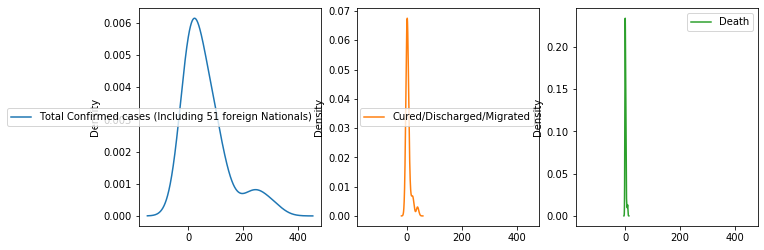

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plot_size = plt.rcParams["figure.figsize"] 
plot_size[0] = 15
plot_size[1] = 4
plt.rcParams["figure.figsize"] = plot_size
mohwf.iloc[:,1:].plot(kind='density', subplots=True, layout=(1,4), sharex=True)
plt.show()

The peaks of a Density Plot help display where values are concentrated over the interval. This graphs infer India in still in still [stage 2](https://www.connectedtoindia.com/the-four-stages-of-covid-19-explained-7280.html) of the Covid19.

`Probability density is the probability per unit on the x-axis`

**Stage 1**: When cases are only imported from affected countries and therefore only those who have travelled abroad test positive. At this stage there is no spread of the disease locally. 

**Stage 2**: When there is local transmission from infected persons. This will usually be relatives or acquaintances of those who travelled abroad who test positive after close contact with the infected person.

At this stage, fewer people are affected, the source of the virus is known and is therefore easier to perform contact tracing and contain the spread via self-quarantining. Countries like India are currently in Stage 2. 

**Stage 3**: This is the stage of community transmission. In this stage those who have not been exposed to an infected person or anyone who has a travel history to affected countries, still test positive. In other words, people are unable to identify where they might have picked up the virus from. Countries like Singapore, Australia are currently in Stage 3.  

**Stage 4**: This is the worst stage of the infection where it takes on the form of an epidemic. Massive numbers are infected and it is very difficult to control and contain the spread. This is what China dealt with. USA, Italy and Spain is under this stage.

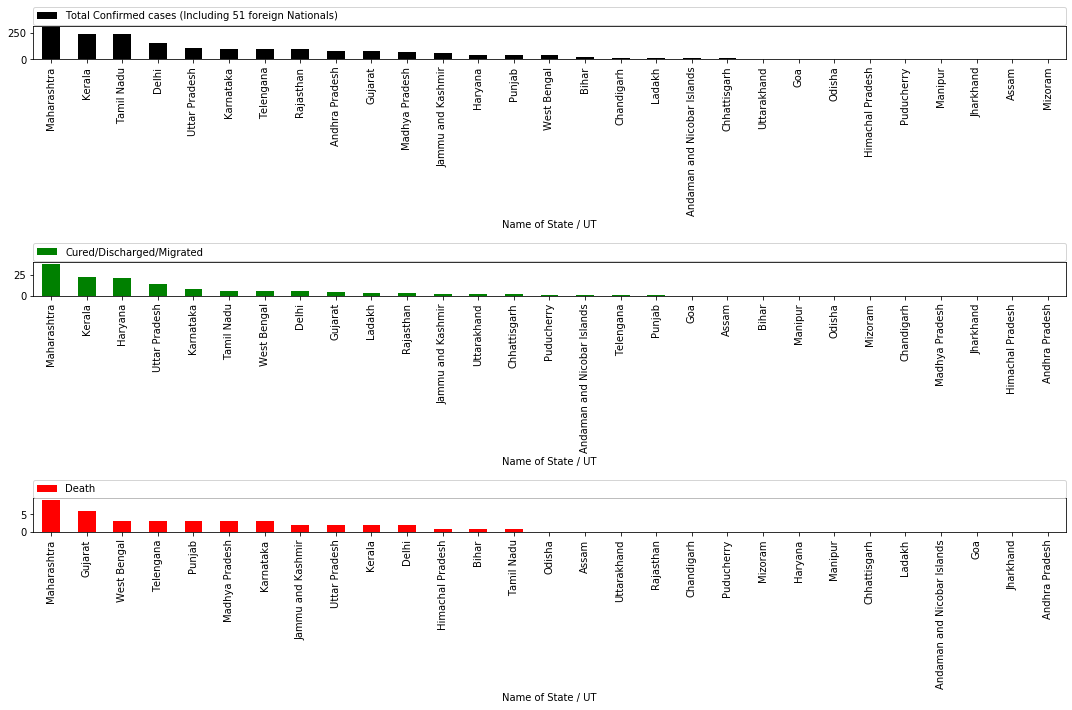

In [11]:
fig, axs = plt.subplots(3,1,figsize=(15,10))
mohwf.sort_values([list(mohwf.columns)[1]], ascending=[False]).plot(x=list(mohwf.columns)[0], y=list(mohwf.columns)[1], kind = 'bar',color='k',ax=axs[0])
axs[0].legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=4, mode="expand", borderaxespad=0.)
ax0=mohwf.sort_values([list(mohwf.columns)[2]], ascending=[False]).plot(x=list(mohwf.columns)[0], y=list(mohwf.columns)[2], kind = 'bar',color='g',ax=axs[1])
axs[1].legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=4, mode="expand", borderaxespad=0.)
ax0=mohwf.sort_values([list(mohwf.columns)[3]], ascending=[False]).plot(x=list(mohwf.columns)[0], y=list(mohwf.columns)[3], kind = 'bar',color='r',ax=axs[2])
axs[2].legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=4, mode="expand", borderaxespad=0.)
plt.tight_layout()

# [covid19india](https://www.covid19india.org) data analysis

In [12]:
delta,statewise,cases_time_series,tested=coviddata.statewise()

In [13]:
delta.T

,0
confirmeddelta,4
counterforautotimeupdate,645
deceaseddelta,0
lastupdatedtime,02/04/2020 09:52:25
recovereddelta,2
statesdelta,0


In [14]:
statewise.iloc[0,:]

active                            1791
confirmed                         2018
deaths                              56
lastupdatedtime    02/04/2020 09:52:25
recovered                          171
state                            Total
active                               4
confirmed                            4
deaths                               0
recovered                            0
Name: 0, dtype: object

In [15]:
statewise.iloc[1:,:]

,active,confirmed,deaths,lastupdatedtime,recovered,state,active,confirmed,deaths,recovered
1,282,335,14,02/04/2020 00:02:28,39,Maharashtra,0,0,0,0
2,237,265,2,01/04/2020 19:27:27,26,Kerala,0,0,0,0
3,227,234,1,01/04/2020 18:17:28,6,Tamil Nadu,0,0,0,0
4,144,152,2,01/04/2020 19:47:26,6,Delhi,0,0,0,0
5,117,120,0,01/04/2020 18:17:27,3,Rajasthan,0,0,0,0
6,98,117,2,01/04/2020 18:17:29,17,Uttar Pradesh,0,0,0,0
7,109,111,0,01/04/2020 22:22:28,2,Andhra Pradesh,0,0,0,0
8,98,110,3,01/04/2020 20:02:34,9,Karnataka,0,0,0,0
9,77,97,6,01/04/2020 16:12:28,14,Telangana,0,0,0,0
10,74,87,6,02/04/2020 09:52:29,7,Gujarat,0,0,0,0


In [16]:
statewise=statewise.iloc[1:,:-4]
statewise[["active","confirmed","deaths","recovered"]]=statewise[["active","confirmed","deaths","recovered"]].astype(int)

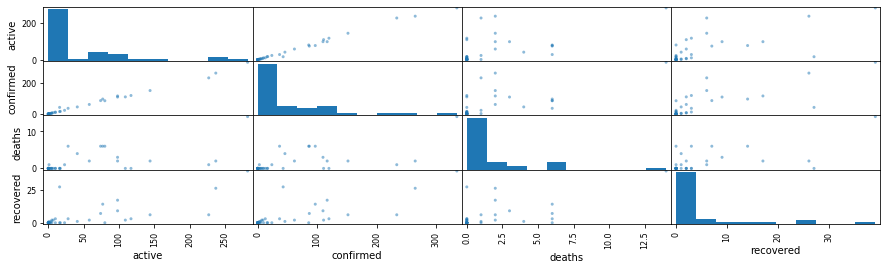

In [17]:
from pandas.plotting import scatter_matrix
scatter_matrix(statewise)
plt.show()

In [18]:
corr = statewise.corr(method ='spearman')
corr.style.background_gradient(cmap='coolwarm')

,active,confirmed,deaths,recovered
active,1,0.995807,0.68068,0.749688
confirmed,0.995807,1,0.683831,0.794862
deaths,0.68068,0.683831,1,0.595346
recovered,0.749688,0.794862,0.595346,1


This shows recovery rate is very low in case of India as active and confirmed cases are highly coorelated.

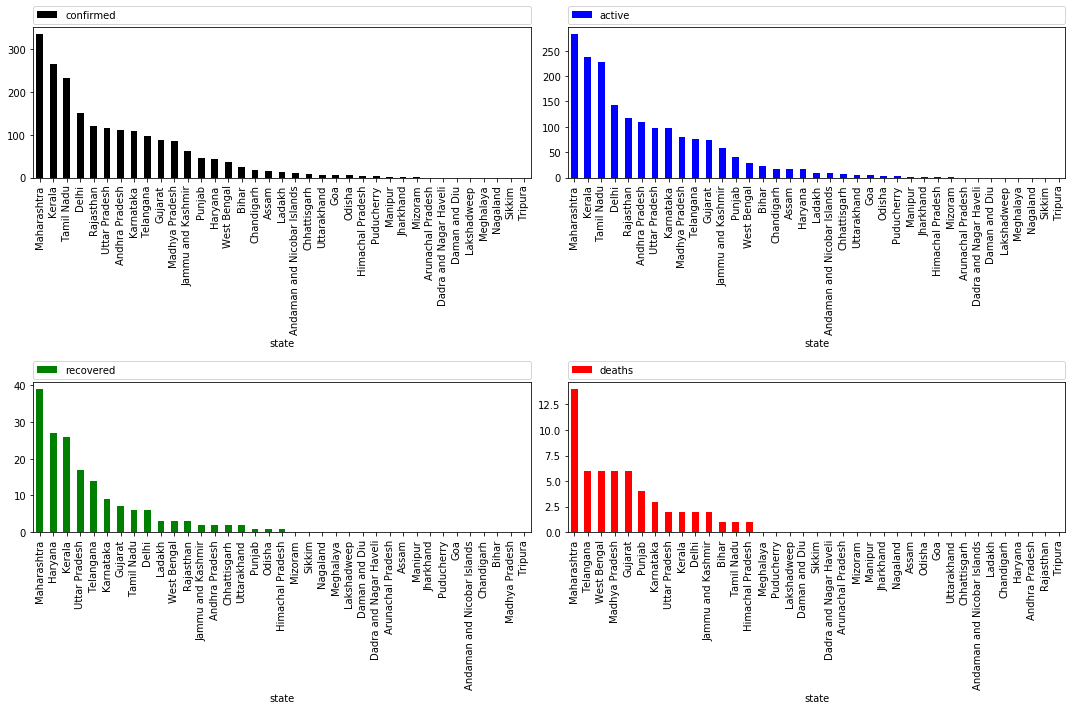

In [19]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
statewise.sort_values(['confirmed'], ascending=[False]).plot(x='state', y='confirmed', kind = 'bar',color='k',ax=axs[0,0])
axs[0,0].legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=4, mode="expand", borderaxespad=0.)
statewise.sort_values(['active'], ascending=[False]).plot(x='state', y='active', kind = 'bar',color='b',ax=axs[0,1])
axs[0,1].legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=4, mode="expand", borderaxespad=0.)
ax0=statewise.sort_values(['recovered'], ascending=[False]).plot(x='state', y='recovered', kind = 'bar',color='g',ax=axs[1,0])
axs[1,0].legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=4, mode="expand", borderaxespad=0.)
ax0=statewise.sort_values(['deaths'], ascending=[False]).plot(x='state', y='deaths', kind = 'bar',color='r',ax=axs[1,1])
axs[1,1].legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=4, mode="expand", borderaxespad=0.)
plt.tight_layout()

In [20]:
cases_time_series[["dailyconfirmed","dailydeceased","dailyrecovered","totalconfirmed","totaldeceased","totalrecovered"]]=cases_time_series[["dailyconfirmed","dailydeceased","dailyrecovered","totalconfirmed","totaldeceased","totalrecovered"]].astype(int)
cases_time_series

,dailyconfirmed,dailydeceased,dailyrecovered,date,death,rec,totalconfirmed,totaldeceased,totalrecovered
0,1,0,0,30 January,0,0,1,0,0
1,0,0,0,31 January,0,0,1,0,0
2,0,0,0,01 February,0,0,1,0,0
3,1,0,0,02 February,0,0,2,0,0
4,1,0,0,03 February,0,0,3,0,0
...,...,...,...,...,...,...,...,...,...
58,143,5,10,28 March,0,0,1029,24,85
59,110,3,17,29 March,28,99,1139,27,102
60,208,16,35,30 March,13,42,1347,43,137
61,288,6,13,31 March,7,19,1635,49,150


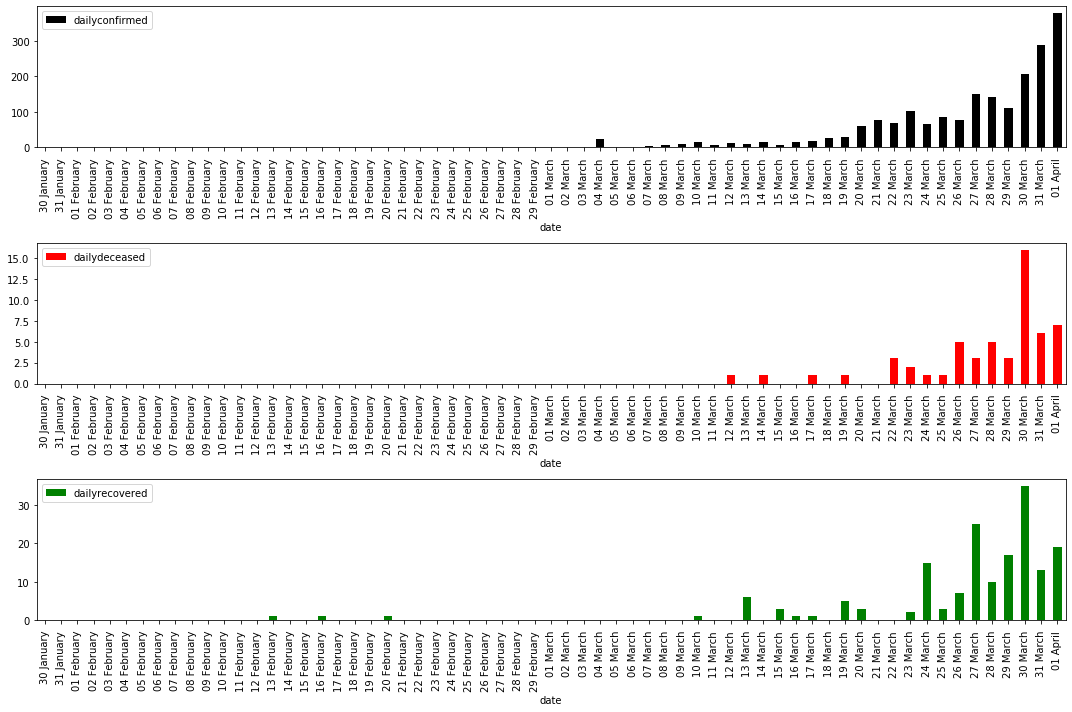

In [21]:
fig, axs = plt.subplots(3,1,figsize=(15,10))
cases_time_series.plot(x='date', y='dailyconfirmed',kind = 'bar',color='k',ax=axs[0])
cases_time_series.plot(x='date', y='dailydeceased',kind = 'bar',color='r',ax=axs[1])
cases_time_series.plot(x='date', y='dailyrecovered',kind = 'bar',color='g',ax=axs[2])
plt.tight_layout()

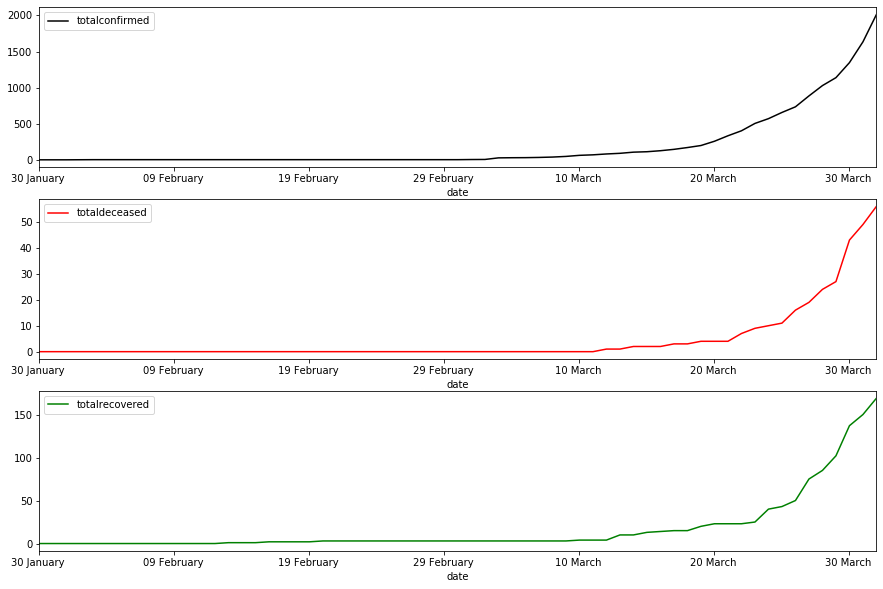

In [22]:
fig, axs = plt.subplots(3,1,figsize=(15,10))
cases_time_series.plot(x='date', y='totalconfirmed',color='k',ax=axs[0])
cases_time_series.plot(x='date', y='totaldeceased',color='r',ax=axs[1])
cases_time_series.plot(x='date', y='totalrecovered',color='g',ax=axs[2])

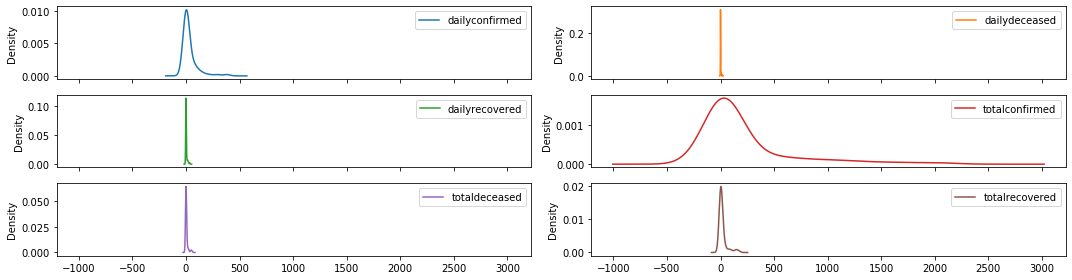

In [23]:
cases_time_series[["dailyconfirmed","dailydeceased","dailyrecovered","totalconfirmed","totaldeceased","totalrecovered"]].plot(kind='density', subplots=True, layout=(3,2), sharex=True)
plt.tight_layout()

In [24]:
corr = cases_time_series[["dailyconfirmed","dailydeceased","dailyrecovered"]].corr(method ='spearman')
corr.style.background_gradient(cmap='coolwarm')

,dailyconfirmed,dailydeceased,dailyrecovered
dailyconfirmed,1,0.750339,0.665849
dailydeceased,0.750339,1,0.683435
dailyrecovered,0.665849,0.683435,1


A **Pearson correlation** is a measure of a linear association between 2 normally distributed random variables. A **Spearman rank correlation** describes the monotonic relationship between 2 variables.

In [25]:
tested

,source,testsconductedbyprivatelabs,totalindividualstested,totalpositivecases,totalsamplestested,updatetimestamp
0,Press_Release_ICMR_13March2020.pdf,,5900,78,6500,13/3/2020 00:00
1,ICMR_website_update_18March_6PM_IST.pdf,,12235,150,13125,18/3/2020 18:00
2,ICMR_website_update_19March_10AM_IST_V2.pdf,,12426,168,13316,19/3/2020 10:00
3,ICMR_website_update_19March_6PM_IST.pdf,,13285,182,14175,19/3/2020 18:00
4,ICMR_website_update_20March_10AM_IST.pdf,,13486,206,14376,20/3/2020 10:00
5,ICMR_website_update_20March_6PM_IST.pdf,,14514,236,15404,20/3/2020 18:00
6,ICMR_website_update_21March_10AM_IST.pdf,,14811,271,15701,21/3/2020 10:00
7,ICMR_website_update_21March_6PM_IST.pdf,,16021,315,16911,21/3/2020 18:00
8,ICMR_website_update_22March_10AM_IST.pdf,,16109,341,16999,22/3/2020 10:00
9,ICMR_website_update_22March_6PM_IST.pdf,,17237,396,18127,22/3/2020 18:00


In [26]:
tested['totalindividualstested'].replace('', 0, inplace=True)
tested['totalpositivecases'].replace('', 0, inplace=True)
tested['totalsamplestested'].replace('', 0, inplace=True)

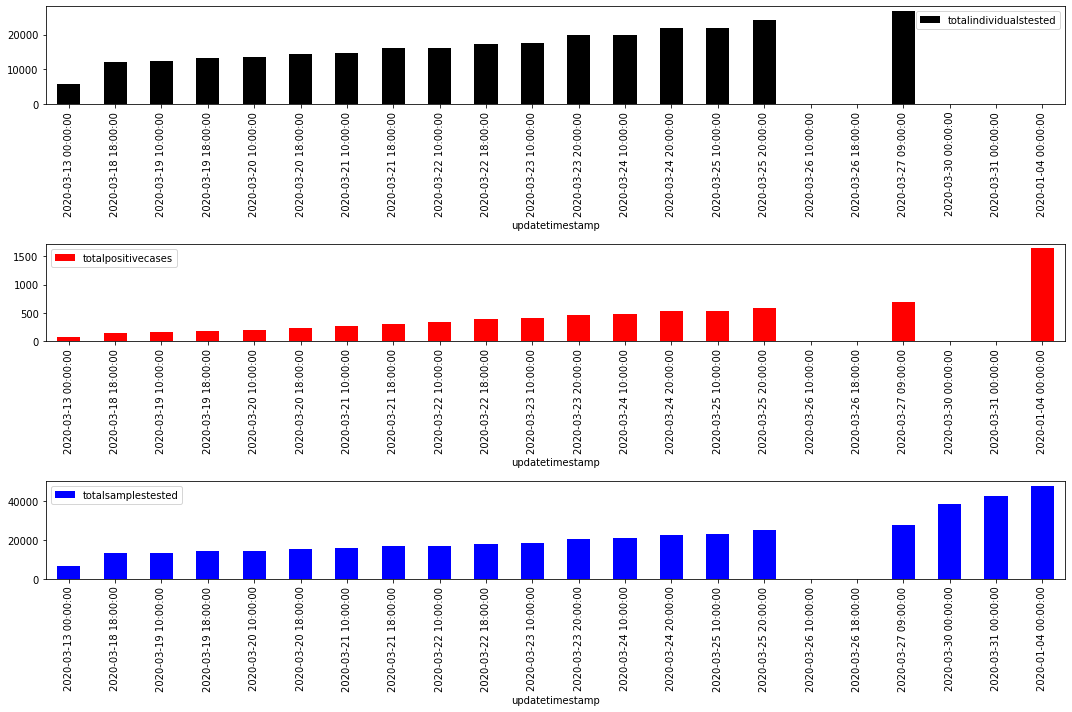

In [27]:
import pandas as pd
tested["updatetimestamp"]=tested["updatetimestamp"].apply(pd.to_datetime)
tested[['totalindividualstested','totalpositivecases','totalsamplestested']]=tested[['totalindividualstested','totalpositivecases','totalsamplestested']].astype(int)
fig, axs = plt.subplots(3,1,figsize=(15,10))
tested.plot(kind='bar',x='updatetimestamp', y='totalindividualstested',color='k',ax=axs[0])
tested.plot(kind='bar',x='updatetimestamp', y='totalpositivecases',color='r',ax=axs[1])
tested.plot(kind='bar',x='updatetimestamp', y='totalsamplestested',color='b',ax=axs[2])
plt.tight_layout()

In [28]:
data=coviddata.raw_data_info()
data

,agebracket,backupnotes,contractedfromwhichpatientsuspected,currentstatus,dateannounced,detectedcity,detecteddistrict,detectedstate,estimatedonsetdate,gender,nationality,notes,patientnumber,source1,source2,source3,statepatientnumber,statuschangedate,typeoftransmission
0,20,Student from Wuhan,,Recovered,30/01/2020,Thrissur,Thrissur,Kerala,,F,India,Travelled from Wuhan,1,https://twitter.com/vijayanpinarayi/status/122...,https://weather.com/en-IN/india/news/news/2020...,,KL-TS-P1,14/02/2020,Imported
1,,Student from Wuhan,,Recovered,02/02/2020,Alappuzha,Alappuzha,Kerala,,,India,Travelled from Wuhan,2,https://www.indiatoday.in/india/story/kerala-r...,https://weather.com/en-IN/india/news/news/2020...,,KL-AL-P1,14/02/2020,Imported
2,,Student from Wuhan,,Recovered,03/02/2020,Kasaragod,Kasaragod,Kerala,,,India,Travelled from Wuhan,3,https://www.indiatoday.in/india/story/kerala-n...,https://twitter.com/ANI/status/122422148580539...,https://weather.com/en-IN/india/news/news/2020...,KL-KS-P1,14/02/2020,Imported
3,45,Travel history to Italy and Austria,,Recovered,02/03/2020,East Delhi (Mayur Vihar),East Delhi,Delhi,,M,India,"Travelled from Austria, Italy",4,https://www.indiatoday.in/india/story/not-a-ja...,https://economictimes.indiatimes.com/news/poli...,,DL-P1,15/03/2020,Imported
4,24,"Travel history to Dubai, Singapore contact",,Recovered,02/03/2020,Hyderabad,Hyderabad,Telangana,,M,India,"Travelled from Dubai to Bangalore on 20th Feb,...",5,https://www.deccanherald.com/national/south/qu...,https://www.indiatoday.in/india/story/coronavi...,https://www.thehindu.com/news/national/coronav...,TS-P1,02/03/2020,Imported
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2035,,,,,,,,,,,,,2036,,,,,,
2036,,,,,,,,,,,,,2037,,,,,,
2037,,,,,,,,,,,,,2038,,,,,,
2038,,,,,,,,,,,,,2039,,,,,,


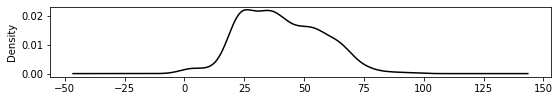

In [29]:
data.query('agebracket != "" & agebracket != "28-35"').agebracket.astype(int).plot(kind='density', subplots=True, layout=(3,2), sharex=True,color="k")
plt.tight_layout()

Most of the infected peoples are having the age group 27-53

In [30]:
data.query('agebracket != "" & agebracket != "28-35"').agebracket.astype(int).describe()

count    714.000000
mean      40.596639
std       16.672147
min        1.000000
25%       27.000000
50%       39.000000
75%       53.000000
max       96.000000
Name: agebracket, dtype: float64

In [31]:
data1=data.query('agebracket != "" & agebracket != "28-35"')
data1.agebracket=data1.agebracket.astype(int)
print("Statistics for age group 27-53")
data1.query('agebracket >=25 and agebracket <=53').currentstatus.value_counts()

Statistics for age group 27-53


Hospitalized    383
Recovered        13
Deceased          5
Name: currentstatus, dtype: int64

In [32]:
print("Statistics for age less than 27")
data1.query('agebracket <25').currentstatus.value_counts()

Statistics for age less than 27


Hospitalized    128
Recovered         8
Name: currentstatus, dtype: int64

In [33]:
print("Statistics for age more than 53")
data1.query('agebracket >=53').currentstatus.value_counts()

Statistics for age more than 53


Hospitalized    147
Recovered        24
Deceased         17
Name: currentstatus, dtype: int64

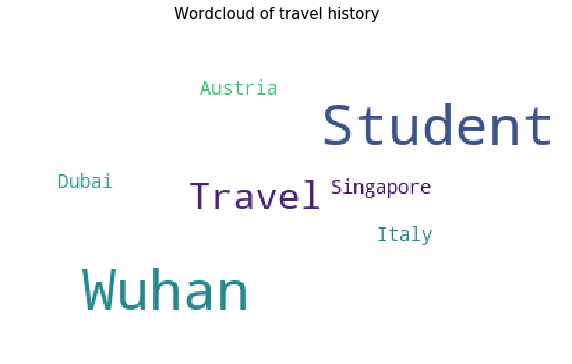

In [34]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords =list(STOPWORDS)
stopwords.extend(["_d180g","Object","Name","NaN","dtype","Length","backupnotes","contact","history"])
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(background_color='white',stopwords=stopwords,max_words=200,max_font_size=40, relative_scaling = 1,random_state=1).generate(str(data))
    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=15)
        fig.subplots_adjust(top=1.25)

    plt.imshow(wordcloud)
    plt.show()
show_wordcloud(data['backupnotes'],title = "Wordcloud of travel history")

In [35]:
data

,agebracket,backupnotes,contractedfromwhichpatientsuspected,currentstatus,dateannounced,detectedcity,detecteddistrict,detectedstate,estimatedonsetdate,gender,nationality,notes,patientnumber,source1,source2,source3,statepatientnumber,statuschangedate,typeoftransmission
0,20,Student from Wuhan,,Recovered,30/01/2020,Thrissur,Thrissur,Kerala,,F,India,Travelled from Wuhan,1,https://twitter.com/vijayanpinarayi/status/122...,https://weather.com/en-IN/india/news/news/2020...,,KL-TS-P1,14/02/2020,Imported
1,,Student from Wuhan,,Recovered,02/02/2020,Alappuzha,Alappuzha,Kerala,,,India,Travelled from Wuhan,2,https://www.indiatoday.in/india/story/kerala-r...,https://weather.com/en-IN/india/news/news/2020...,,KL-AL-P1,14/02/2020,Imported
2,,Student from Wuhan,,Recovered,03/02/2020,Kasaragod,Kasaragod,Kerala,,,India,Travelled from Wuhan,3,https://www.indiatoday.in/india/story/kerala-n...,https://twitter.com/ANI/status/122422148580539...,https://weather.com/en-IN/india/news/news/2020...,KL-KS-P1,14/02/2020,Imported
3,45,Travel history to Italy and Austria,,Recovered,02/03/2020,East Delhi (Mayur Vihar),East Delhi,Delhi,,M,India,"Travelled from Austria, Italy",4,https://www.indiatoday.in/india/story/not-a-ja...,https://economictimes.indiatimes.com/news/poli...,,DL-P1,15/03/2020,Imported
4,24,"Travel history to Dubai, Singapore contact",,Recovered,02/03/2020,Hyderabad,Hyderabad,Telangana,,M,India,"Travelled from Dubai to Bangalore on 20th Feb,...",5,https://www.deccanherald.com/national/south/qu...,https://www.indiatoday.in/india/story/coronavi...,https://www.thehindu.com/news/national/coronav...,TS-P1,02/03/2020,Imported
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2035,,,,,,,,,,,,,2036,,,,,,
2036,,,,,,,,,,,,,2037,,,,,,
2037,,,,,,,,,,,,,2038,,,,,,
2038,,,,,,,,,,,,,2039,,,,,,


Most of the visitors are from Austria, Singapore, Dubai and Wuhan(China)

In [41]:
# from TM import Topic_modeling
# tm=Topic_modeling(data,"backupnotes")# Put your DataFrame as first argument and columns name whose topic modelling you want to do as second argument
# tm.modeling()


Perplexity:  -6.586775212957784

Coherence Score:  -18.05053106871732


(None, None)

<font color="green">Text mining results of object dtypes columns</font>    
* <a href="https://ashishcssom.github.io/Covid19-data-analysis-on-Indian-dataset/notes.html">notes</a>
* <a href="https://ashishcssom.github.io/Covid19-data-analysis-on-Indian-dataset/backupnotes.html">backupnotes</a>

count     874
unique      2
top         M
freq      651
Name: gender, dtype: object

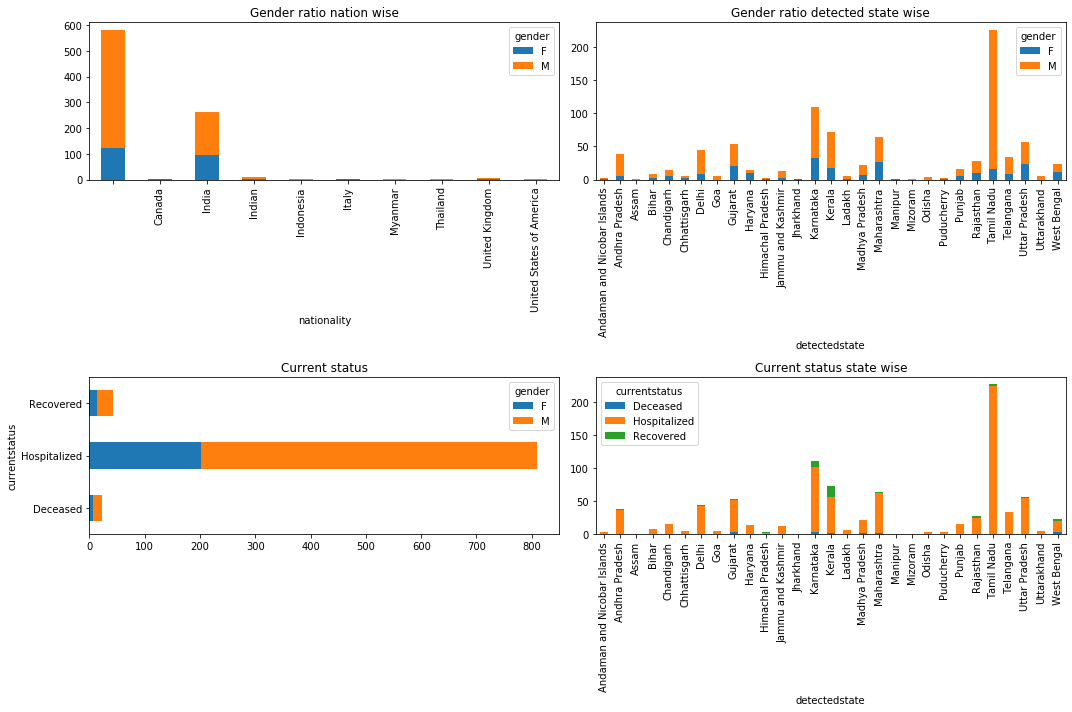

In [37]:
data2=data.query('gender != ""')
fig, axs = plt.subplots(2,2,figsize=(15,10))
data2.groupby(['nationality',"gender"]).size().unstack().plot(kind='bar', stacked=True,title="Gender ratio nation wise",ax=axs[0,0])
data2.groupby(['detectedstate',"gender"]).size().unstack().plot(kind='bar', stacked=True,title="Gender ratio detected state wise",ax=axs[0,1])
data2.groupby(['currentstatus',"gender"]).size().unstack().plot(kind='barh', stacked=True,title="Current status",ax=axs[1,0])
data2.groupby(['detectedstate','currentstatus']).size().unstack().plot(kind='bar', stacked=True,title="Current status state wise",ax=axs[1,1])
plt.tight_layout()
data2.gender.describe()

Males are more infected to this virus. Reason could be `less immunity`, `more travel` or `respiratory illness` due to `smoking habit`

In [38]:
coviddata.travel_history()

,_cn6ca,accuracylocation,address,datasource,latlong,modeoftravel,pid,placename,timefrom,timeto,type,_d2mkx
0,1,,"Hotel Aryas, Kuthattukulam, Muvattupuzha road",https://drive.google.com/drive/folders/1yAgt3I...,"9.8614231,76.5900643",,P35,,29/02/2020 10:30:00,29/02/2020 11:30:00,placeVisit,NaN
1,2,,Suresh Hotel Ranni,https://drive.google.com/drive/folders/1yAgt3I...,"9.3823686,76.779199",,P35,,01/03/2020 21:30:00,01/03/2020 23:00:00,placeVisit,NaN
2,3,,"Post Office Ranni Pazvangadi, Ranni",https://drive.google.com/drive/folders/1yAgt3I...,"9.3757533,76.7763825",,P35,,02/03/2020 11:00:00,02/03/2020 11:30:00,placeVisit,NaN
3,4,,"Knanaya Church, Pazvangadi Ranni",https://drive.google.com/drive/folders/1yAgt3I...,"9.375753,76.7698164",,P35,,02/03/2020 11:30:00,02/03/2020 12:00:00,placeVisit,NaN
4,5,,Post Office Ranni Pazvangadi,https://drive.google.com/drive/folders/1yAgt3I...,"9.3757533,76.7763825",,P35,,02/03/2020 12:00:00,02/03/2020 13:00:00,placeVisit,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
234,235,,Walk in apartment with friend,https://drive.google.com/drive/folders/1yAgt3I...,,,P52,,03/03/2020 17:30,03/03/2020 18:00,placeVisit,NaN
235,236,,Walk in apartment with friend,https://drive.google.com/drive/folders/1yAgt3I...,,,P52,,03/07/2020 17:30,03/07/2020 18:00,placeVisit,NaN
236,237,,Bought medicine at Mediwave,https://drive.google.com/drive/folders/1yAgt3I...,,,P52,,03/08/2020 14:30,03/08/2020 15:00,placeVisit,NaN
237,238,,Met Dhobi in apartment,https://drive.google.com/drive/folders/1yAgt3I...,,,P52,,03/08/2020 20:30,03/08/2020 20:30,placeVisit,NaN


In [39]:
coviddata.state_district_data()

,State_UT,District,Confirmed
0,Kerala,Thrissur,10
1,Kerala,Alappuzha,2
2,Kerala,Kasaragod,121
3,Kerala,Pathanamthitta,12
4,Kerala,Kannur,47
...,...,...,...
208,Assam,Cachar,1
209,Assam,Kamrup Metropolitan,4
210,Assam,Jorhat,8
211,Assam,Goalpara,3


## Conclusion


In this analysis the data is retrive from two Ministry of Health and Family Welfare and covid19india website. After the analysis derived inferences are:
* Outbreak is exotic and transferred to India from people to people transfer from the people having travel history of Wuhan, Italy, Austria, Dubai, and Singapore
* Most of the cases are observed in a densely populated area
* Outbreak is in Stage 2. So, lockdown is some of the measures that can be taken care of
* Rate of screening should increase at a higher temporal and spatial resolution
* Males are more infected to this virus
* Old people are less immune to this disease. that's why more death happened in old age group [>55]

***Several more conclusions can be drawn from this analysis***